Epoch 1/10: 100%|██████████| 727/727 [01:58<00:00,  6.13batch/s]


Epoch 1/10, Loss: 1.1470, Train Accuracy: 0.5575


Validation: 100%|██████████| 182/182 [00:21<00:00,  8.54batch/s]


Validation Loss: 1.1870, Validation Accuracy: 0.5543


Epoch 2/10: 100%|██████████| 727/727 [01:59<00:00,  6.08batch/s]


Epoch 2/10, Loss: 0.8129, Train Accuracy: 0.7014


Validation: 100%|██████████| 182/182 [00:20<00:00,  9.07batch/s]


Validation Loss: 1.3340, Validation Accuracy: 0.5399


Epoch 3/10: 100%|██████████| 727/727 [01:57<00:00,  6.19batch/s]


Epoch 3/10, Loss: 0.6446, Train Accuracy: 0.7662


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.27batch/s]


Validation Loss: 1.2015, Validation Accuracy: 0.6066


Epoch 4/10: 100%|██████████| 727/727 [01:56<00:00,  6.23batch/s]


Epoch 4/10, Loss: 0.4820, Train Accuracy: 0.8283


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.27batch/s]


Validation Loss: 1.1583, Validation Accuracy: 0.6480


Epoch 5/10: 100%|██████████| 727/727 [01:56<00:00,  6.23batch/s]


Epoch 5/10, Loss: 0.3195, Train Accuracy: 0.8946


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.17batch/s]


Validation Loss: 1.2800, Validation Accuracy: 0.6416


Epoch 6/10: 100%|██████████| 727/727 [01:56<00:00,  6.22batch/s]


Epoch 6/10, Loss: 0.1876, Train Accuracy: 0.9412


Validation: 100%|██████████| 182/182 [00:20<00:00,  9.05batch/s]


Validation Loss: 1.5890, Validation Accuracy: 0.6127


Epoch 7/10: 100%|██████████| 727/727 [01:57<00:00,  6.21batch/s]


Epoch 7/10, Loss: 0.1143, Train Accuracy: 0.9669


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.33batch/s]


Validation Loss: 1.5367, Validation Accuracy: 0.6338


Epoch 8/10: 100%|██████████| 727/727 [01:56<00:00,  6.22batch/s]


Epoch 8/10, Loss: 0.0765, Train Accuracy: 0.9805


Validation: 100%|██████████| 182/182 [00:20<00:00,  8.89batch/s]


Validation Loss: 1.5859, Validation Accuracy: 0.6505


Epoch 9/10: 100%|██████████| 727/727 [01:57<00:00,  6.21batch/s]


Epoch 9/10, Loss: 0.0527, Train Accuracy: 0.9880


Validation: 100%|██████████| 182/182 [00:20<00:00,  9.03batch/s]


Validation Loss: 1.5406, Validation Accuracy: 0.6636


Epoch 10/10: 100%|██████████| 727/727 [01:57<00:00,  6.21batch/s]


Epoch 10/10, Loss: 0.0440, Train Accuracy: 0.9899


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.19batch/s]


Validation Loss: 1.6386, Validation Accuracy: 0.6511
Classification Report for Validation Set:
              precision    recall  f1-score   support

       anger       0.54      0.48      0.51       638
    contempt       0.64      0.58      0.61       578
     disgust       0.33      0.70      0.45       491
        fear       0.53      0.49      0.51       636
       happy       0.94      0.89      0.92      1039
     neutral       0.87      0.90      0.88      1019
         sad       0.54      0.42      0.47       613
    surprise       0.66      0.47      0.55       795

    accuracy                           0.65      5809
   macro avg       0.63      0.62      0.61      5809
weighted avg       0.68      0.65      0.66      5809



<Figure size 1000x1000 with 0 Axes>

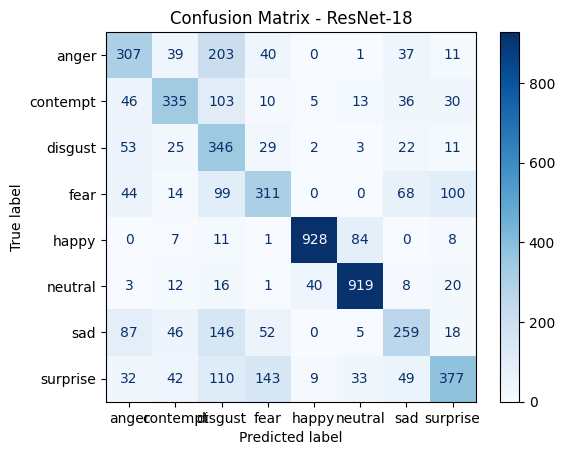

<Figure size 1000x1000 with 0 Axes>

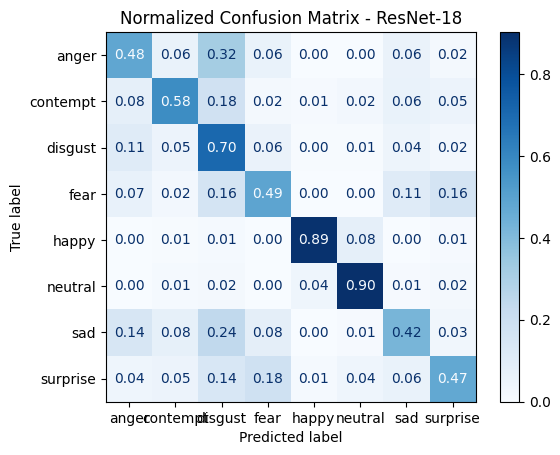

In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# To load Custom loadAffectNetdata class
class loadAffectNetdata(datasets.ImageFolder):
    def find_classes(self, directory):
        classes = [d.name for d in os.scandir(directory) if d.is_dir() and d.name != ".ipynb_checkpoints"]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

# Initial Transformations
base_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Loading the dataset
base_dir = '/kaggle/input/affectnet-training-data'
dataset = loadAffectNetdata(root=base_dir, transform=base_transform)

# Splitting the dataset in 80-20 ratio
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Loading the Basic ResNet-18 model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 8)  # 8 classes
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training Loop
num_epochs = 10
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    
    # Evaluating the Validation set
    model.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation', unit='batch'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader.dataset)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Save the model
torch.save(model.state_dict(), 'basic_resnet18_affectnet.pth')

# Evaluating the model
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Classification Report
report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print("Classification Report for Validation Set:")
print(report)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=dataset.classes)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 10))
cmd.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - ResNet-18')
plt.show()

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd_normalized = ConfusionMatrixDisplay(cm_normalized, display_labels=dataset.classes)

# Plotting Normalized Confusion Matrix
plt.figure(figsize=(10, 10))
cmd_normalized.plot(cmap='Blues', values_format='.2f')
plt.title('Normalized Confusion Matrix - ResNet-18')
plt.show()


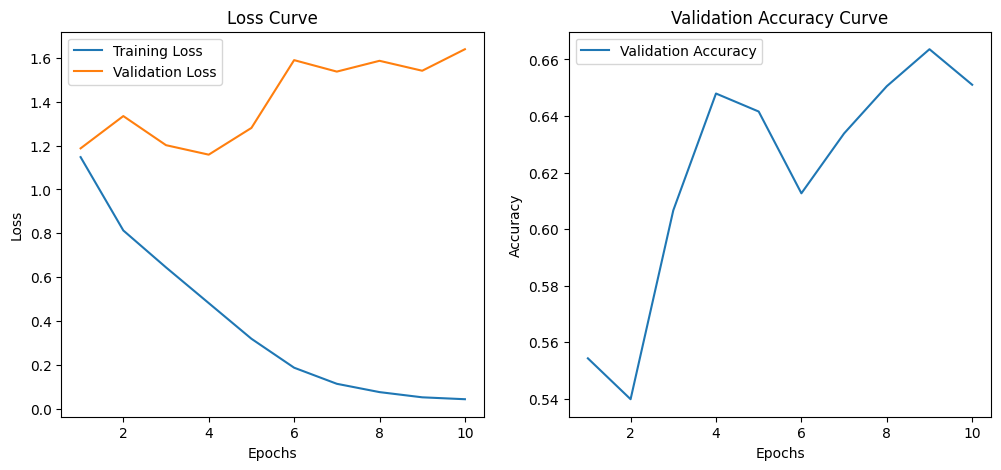

In [4]:
# Plotting Loss and Accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy Curve')
plt.show()


In [3]:
print(dataset.classes)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 150MB/s] 
Epoch 1/10: 100%|██████████| 727/727 [03:24<00:00,  3.56batch/s]


Epoch 1/10, Loss: 1.0884, Train Accuracy: 0.5853


Validation: 100%|██████████| 182/182 [00:41<00:00,  4.36batch/s]


Validation Loss: 1.1261, Validation Accuracy: 0.5736


Epoch 2/10: 100%|██████████| 727/727 [02:04<00:00,  5.83batch/s]


Epoch 2/10, Loss: 0.8957, Train Accuracy: 0.6641


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.29batch/s]


Validation Loss: 0.9475, Validation Accuracy: 0.6566


Epoch 3/10: 100%|██████████| 727/727 [02:01<00:00,  5.96batch/s]


Epoch 3/10, Loss: 0.8008, Train Accuracy: 0.7059


Validation: 100%|██████████| 182/182 [00:21<00:00,  8.35batch/s]


Validation Loss: 0.9555, Validation Accuracy: 0.6543


Epoch 4/10: 100%|██████████| 727/727 [02:07<00:00,  5.70batch/s]


Epoch 4/10, Loss: 0.7144, Train Accuracy: 0.7380


Validation: 100%|██████████| 182/182 [00:20<00:00,  8.94batch/s]


Validation Loss: 0.9346, Validation Accuracy: 0.6683


Epoch 5/10: 100%|██████████| 727/727 [01:59<00:00,  6.08batch/s]


Epoch 5/10, Loss: 0.6100, Train Accuracy: 0.7786


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.14batch/s]


Validation Loss: 0.9630, Validation Accuracy: 0.6671


Epoch 6/10: 100%|██████████| 727/727 [02:01<00:00,  6.00batch/s]


Epoch 6/10, Loss: 0.4948, Train Accuracy: 0.8233


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.12batch/s]


Validation Loss: 1.0942, Validation Accuracy: 0.6566


Epoch 7/10: 100%|██████████| 727/727 [02:01<00:00,  6.00batch/s]


Epoch 7/10, Loss: 0.3669, Train Accuracy: 0.8713


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.16batch/s]


Validation Loss: 1.0592, Validation Accuracy: 0.6743


Epoch 8/10: 100%|██████████| 727/727 [02:00<00:00,  6.04batch/s]


Epoch 8/10, Loss: 0.2507, Train Accuracy: 0.9125


Validation: 100%|██████████| 182/182 [00:20<00:00,  9.05batch/s]


Validation Loss: 1.3856, Validation Accuracy: 0.6476


Epoch 9/10: 100%|██████████| 727/727 [02:01<00:00,  5.98batch/s]


Epoch 9/10, Loss: 0.1781, Train Accuracy: 0.9394


Validation: 100%|██████████| 182/182 [00:20<00:00,  8.91batch/s]


Validation Loss: 1.7328, Validation Accuracy: 0.6507


Epoch 10/10: 100%|██████████| 727/727 [02:01<00:00,  5.97batch/s]


Epoch 10/10, Loss: 0.1533, Train Accuracy: 0.9483


Validation: 100%|██████████| 182/182 [00:21<00:00,  8.60batch/s]


Validation Loss: 1.5747, Validation Accuracy: 0.6517
Classification Report for Validation Set:
              precision    recall  f1-score   support

       anger       0.49      0.58      0.53       646
    contempt       0.60      0.66      0.63       607
     disgust       0.47      0.42      0.44       508
        fear       0.49      0.59      0.53       615
       happy       0.93      0.88      0.90      1001
     neutral       0.84      0.92      0.88       986
         sad       0.49      0.48      0.48       624
    surprise       0.63      0.43      0.51       822

    accuracy                           0.65      5809
   macro avg       0.62      0.62      0.61      5809
weighted avg       0.66      0.65      0.65      5809



<Figure size 1000x1000 with 0 Axes>

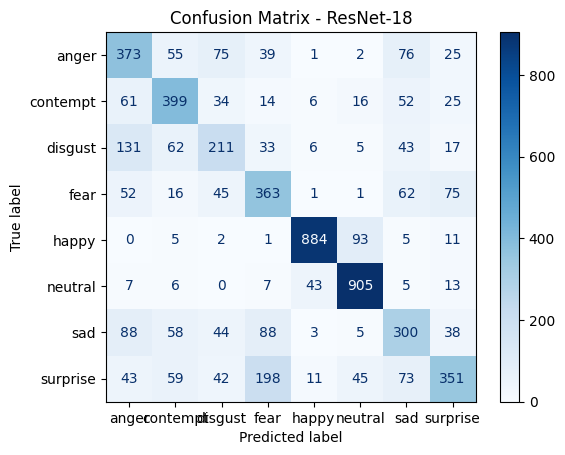

<Figure size 1000x1000 with 0 Axes>

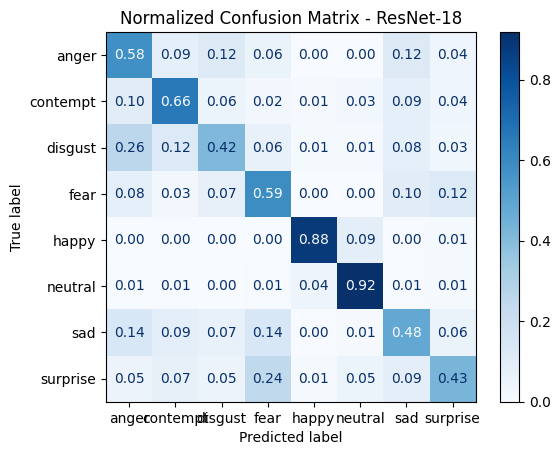

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# To Load Custom loadAffectNetdata class
class loadAffectNetdata(datasets.ImageFolder):
    def find_classes(self, directory):
        classes = [d.name for d in os.scandir(directory) if d.is_dir() and d.name != ".ipynb_checkpoints"]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

# Initial Transformations
base_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Loading the dataset
base_dir = '/kaggle/input/affectnet-training-data'
dataset = loadAffectNetdata(root=base_dir, transform=base_transform)

# Splitting the dataset in 80-20 ratio
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Loading the Basic ResNet-18 model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 8)  # Assuming 8 classes
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 10
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    
    #Evaluationg the Validation set
    model.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation', unit='batch'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader.dataset)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Save the model
torch.save(model.state_dict(), 'basic_resnet18_affectnet.pth')

# Evaluating the model
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Classification Report
report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print("Classification Report for Validation Set:")
print(report)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=dataset.classes)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 10))
cmd.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - ResNet-18')
plt.show()

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd_normalized = ConfusionMatrixDisplay(cm_normalized, display_labels=dataset.classes)

# Plotting Normalized Confusion Matrix
plt.figure(figsize=(10, 10))
cmd_normalized.plot(cmap='Blues', values_format='.2f')
plt.title('Normalized Confusion Matrix - ResNet-18')
plt.show()


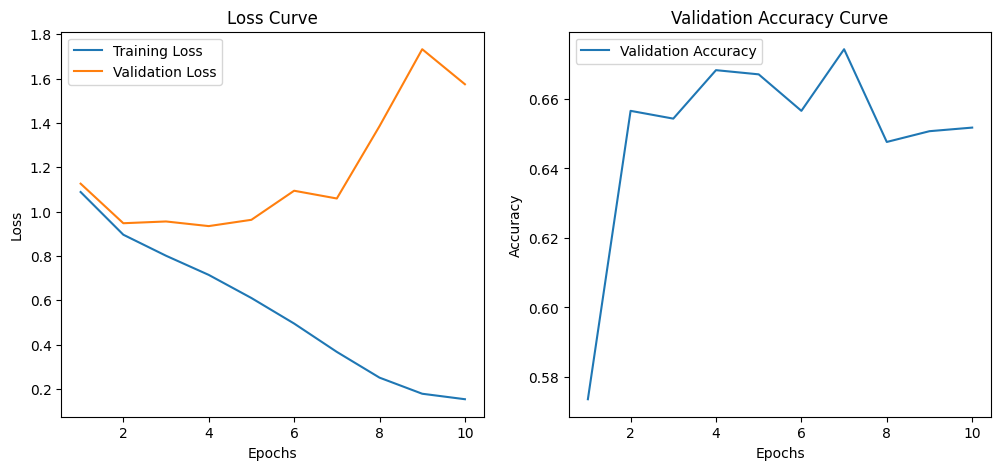

In [2]:
# Plotting Loss and Accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy Curve')
plt.show()
